In [14]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, random_state=51, n_classes = 2, n_clusters_per_class = 1, hypercube=False, class_sep = 10)

In [15]:
import matplotlib.pyplot as plt

# Basic Perceptron implementation

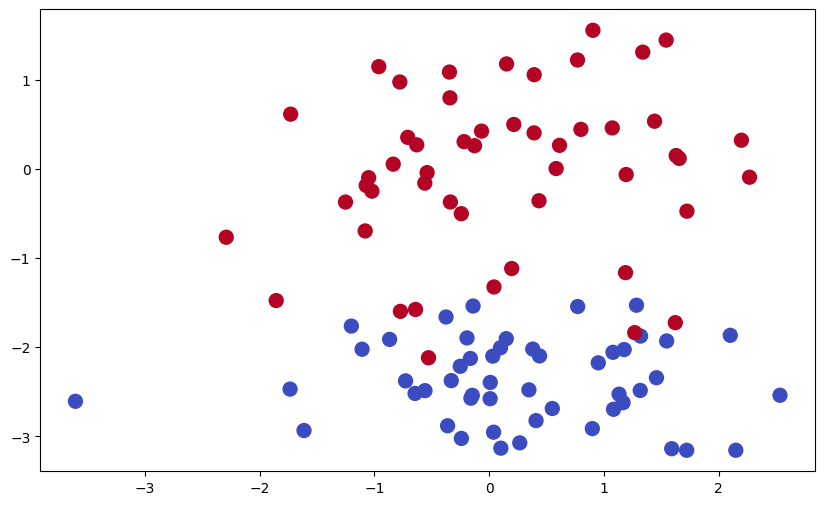

In [16]:
plt.figure(figsize = (10, 6))
plt.scatter(x = X[:, 0], y = X[:, 1], c = y, cmap = 'coolwarm', s= 100)
plt.show()

In [21]:
def perceptron(X, y, epochs = 10, learning_rate = 0.1):
  X = np.hstack((X, np.ones((X.shape[0], 1)))) #adding bias column
  W = np.random.randn(X.shape[1])*0.01
  for i in range(epochs):
    for j in range(0, X.shape[0]): #loop through each data
      y_true = y[j]
      y_pred = np.dot(X[j], W)
      y_pred = 1 if y_pred > 0 else 0 #step activation function
      W = W + learning_rate*(y_true - y_pred)*X[j] #update rule
  return W

However, you can shuffle the data in each epoch for better convergence:

indices = np.random.permutation(X.shape[0])
for i in indices:
    y_true = y[i]
    ...

This mimics Stochastic Gradient Descent (SGD) behavior.

In [22]:
def perceptron_predict(W, X):
  y_pred = []
  X = np.hstack((X, np.ones((X.shape[0], 1))))
  for i in range(0, X.shape[0]): #loop through each data
    pred = np.dot(X[i], W)
    y_pred.append(1 if pred >0 else 0)
  return np.array(y_pred)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
weights = perceptron(X_train, y_train, epochs = 100, learning_rate = 0.01)

In [25]:
y_pred = perceptron_predict(weights, X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
print(accuracy_score(y_test, y_pred))

1.0


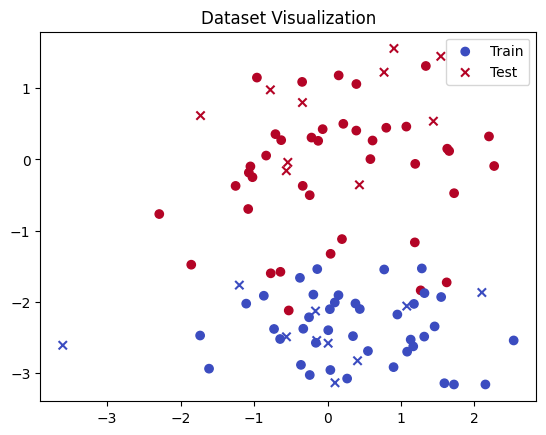

In [28]:
# If data is 2D, plot it
if X_train.shape[1] == 2:
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', label='Test')
    plt.legend()
    plt.title("Dataset Visualization")
    plt.show()


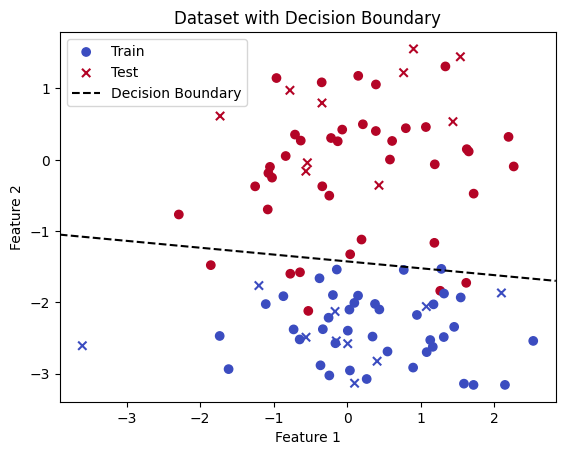

In [29]:

# Ensure weights are correctly extracted
w1, w2, b = weights[0], weights[1], weights[2]

# Create the plot
fig, ax = plt.subplots()

# Scatter plot of data points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", label="Train")
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", marker="x", label="Test")

# Plot decision boundary as an infinite line
if w2 != 0:  # Avoid division by zero
    slope = -w1 / w2
    intercept = -b / w2
    ax.axline((0, intercept), slope=slope, color="black", linestyle="--", label="Decision Boundary")

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.title("Dataset with Decision Boundary")
plt.show()


# Scikit Learn Perceptron Implementation


In [32]:
def scikitPerceptron(X, y, epochs = 10, learning_rate = 0.1):
  X = np.hstack((X, np.ones((X.shape[0], 1)))) #adding bias column
  W = np.random.randn(X.shape[1])*0.01

  # ensure label are in [-1,1] instead of [0,1]
  y = np.where(y == 0, -1, 1)
  for i in range(epochs):
    for j in range(0, X.shape[0]): #loop through each data
      if y[j] * np.dot(X[j], W) < 1:  # check the margin/loss condition
        W = W + learning_rate*(y[j]*X[j]) #update rule
  return W


In [38]:
def scikitPerceptron_predict(W, X):
  y_pred = []
  X = np.hstack((X, np.ones((X.shape[0], 1))))
  for i in range(0, X.shape[0]): #loop through each data
    pred = np.dot(X[i], W)
    y_pred.append(1 if pred > 0 else -1)
  y_pred = np.array(y_pred)
  y_pred = np.where(y_pred == -1, 0, 1)
  return y_pred

In [34]:
weights = scikitPerceptron(X_train, y_train, epochs = 100, learning_rate = 0.01)

In [39]:
y_pred = scikitPerceptron_predict(weights, X_test)

In [40]:
accuracy_score(y_test, y_pred)

1.0

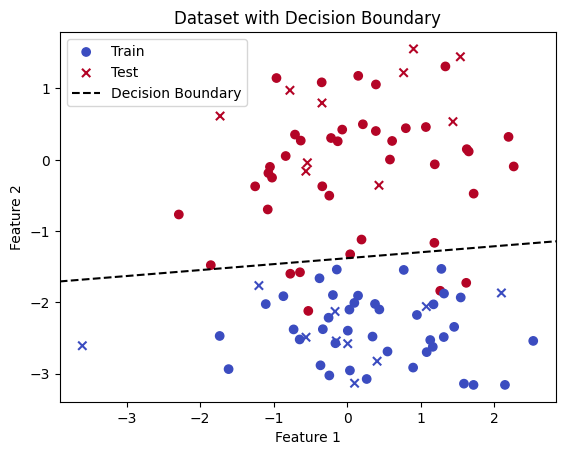

In [41]:

# Ensure weights are correctly extracted
w1, w2, b = weights[0], weights[1], weights[2]

# Create the plot
fig, ax = plt.subplots()

# Scatter plot of data points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", label="Train")
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="coolwarm", marker="x", label="Test")

# Plot decision boundary as an infinite line
if w2 != 0:  # Avoid division by zero
    slope = -w1 / w2
    intercept = -b / w2
    ax.axline((0, intercept), slope=slope, color="black", linestyle="--", label="Decision Boundary")

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()
plt.title("Dataset with Decision Boundary")
plt.show()
